**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4
CA,3.360,12.0
CO,3.808,13.6
CT,3.888,10.8
DE,4.860,16.2
DC,1.593,5.9


## How do we compute a `LinearRegression` Model in Python?

### Import the Class

In [2]:
from sklearn.linear_model import LinearRegression

### Instantiate the Class

In [3]:
model_lr = LinearRegression()

### Fit the Model

In [5]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [10]:
target= df_crashes[['accidents']]
features=df_crashes['alcohol']

### Fit the Model Again

In [11]:
model_lr.fit(X=target ,y=features)

LinearRegression()

### [ ] Predictions

#### Calculate the Predictions

In [12]:
model_lr.predict(X=target)

array([5.96327536, 5.7129123 , 5.89174306, 7.25085684, 3.53117702,
       4.10343545, 3.10198319, 5.03335541, 1.34944174, 5.64137999,
       4.81875849, 5.49831539, 4.71146004, 3.81730624, 4.42533082,
       4.85452465, 5.60561384, 6.89319532, 6.57129995, 4.63992773,
       3.71000778, 2.17206324, 4.28226621, 2.67278937, 5.53408154,
       4.99758926, 6.89319532, 4.56839543, 4.49686313, 3.38811241,
       3.2450478 , 5.82021075, 3.63847547, 5.24795232, 7.78734912,
       4.28226621, 6.35670304, 3.81730624, 5.74867845, 3.20928165,
       7.78734912, 6.17787228, 6.21363843, 6.17787228, 3.28081395,
       4.10343545, 3.78154008, 3.03045089, 7.75158297, 4.17496776,
       5.46254923])

#### Add a New Column with the Predictions

In [14]:
df_crashes['predict']= model_lr.predict(X=target)
df_crashes

,alcohol,accidents,predict
abbrev,,,
AL,5.640,18.8,5.963275
AK,4.525,18.1,5.712912
AZ,5.208,18.6,5.891743
AR,5.824,22.4,7.250857
CA,3.360,12.0,3.531177
CO,3.808,13.6,4.103435
CT,3.888,10.8,3.101983
DE,4.860,16.2,5.033355
DC,1.593,5.9,1.349442


### Model Visualization

<AxesSubplot:xlabel='accidents', ylabel='alcohol'>

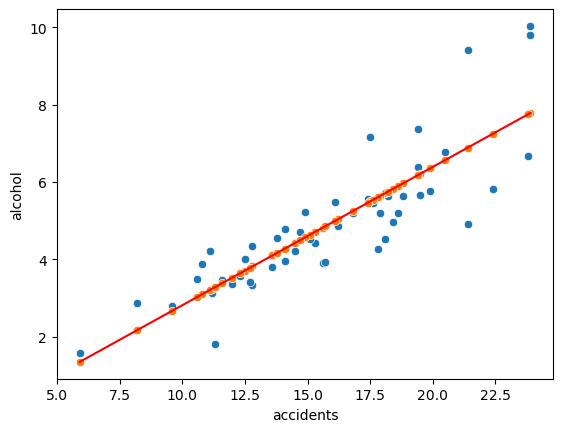

In [16]:
sns.scatterplot(x='accidents',y='alcohol',data=df_crashes)
sns.scatterplot(x='accidents',y ='predict',data=df_crashes)
sns.lineplot(x='accidents',y='predict',data=df_crashes, color ='red')

### [ ] Model's Score

#### Calculate the Score

In [18]:
model_lr.score(X=target, y=features)

0.7269492966665407

#### Explain the Score

##### Residuals

##### Target's Variation

##### The Ratio

### [ ] Model Interpretation

In [ ]:
from sklearn.ensemble import Rando

## [ ] Other Regression Models

### `RandomForestRegressor()` in Python

In [22]:
from sklearn.ensemble import RandomForestRegressor

#### Fit the Model

#### Calculate Predictions

#### Model's Score

### `SVR()` in Python

#### Fit the Model

#### Calculate Predictions

#### Model's Score

## Which One Is the Best? Why?

## [ ] Visualize the 3 Models

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.